In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("../model")
sys.path.append("../control")
sys.path.append("../analysis")
from networks import *
from analysis_util import *

from kooc_fns import *
from ilqr_fns import *
from control_util import *
%load_ext autoreload
%autoreload 2

In [4]:
model_names = ["d-n-exp-1", "d-n-exp-2", "d-n-exp-3", "d-n-exp-4", "d-n-exp-5"]
model_labels = [r"$n=2$", r"$n=5$", r"$n=10$", r"$n=25$", r"$n=50$"]
PATH = "../saved/logs/models/denis-nshifts-exp/pendulum"
x_true = np.load('../data/raw_data/affine/pend_val.npy')

models, model_configs = load_models([DENIS]*5, PATH, model_names)

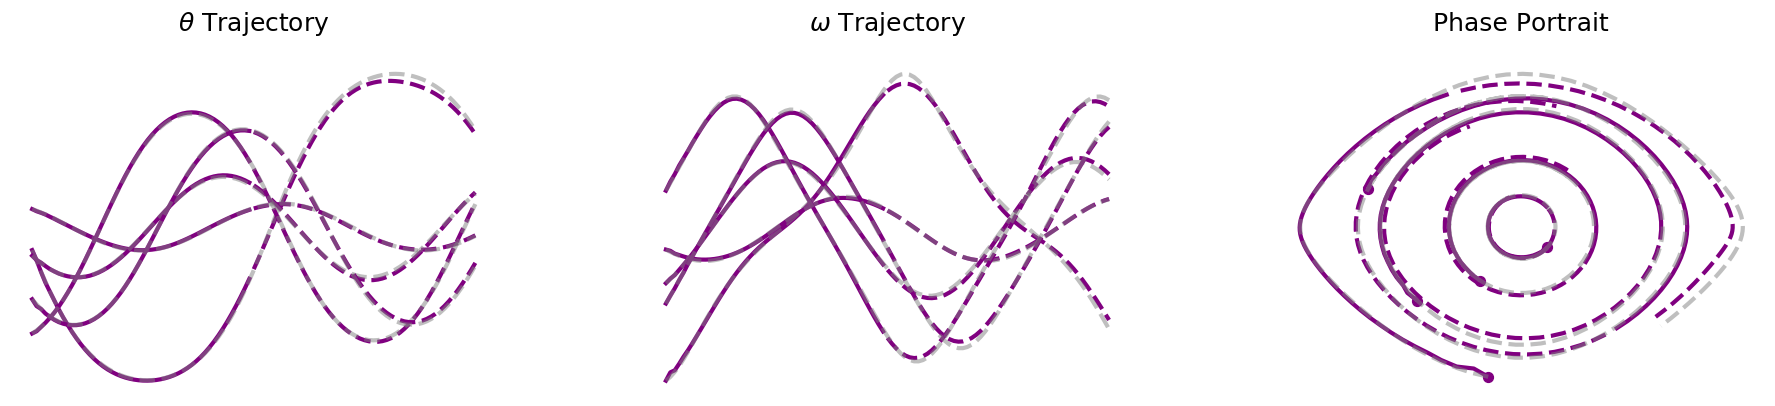

In [5]:
_ = plot_trajectories(models[-1], 50, x_true)

In [6]:
idx = np.random.randint(0, len(x_true), 10)
init_cond = x_true[idx, 0:1, :]
x_goal = [np.pi, 0]
model = models[1]
Q = [2, 0]
qs = [5, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Qs = [[q, 0] for q in qs]

In [7]:
results1 = kooc_eval(models[0], init_cond, x_goal, 100, Qs)
results2 = kooc_eval(models[1], init_cond, x_goal, 100, Qs)
results3 = kooc_eval(models[2], init_cond, x_goal, 100, Qs)
results4 = kooc_eval(models[3], init_cond, x_goal, 100, Qs)
results5 = kooc_eval(models[4], init_cond, x_goal, 100, Qs)

100%|██████████| 12/12 [00:55<00:00,  4.60s/it]


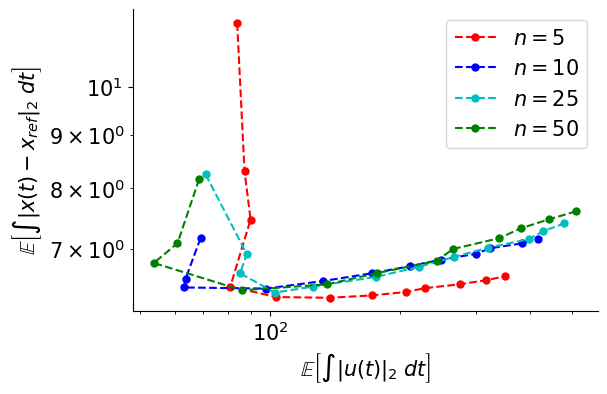

In [12]:
fig, ax = plt.subplots(1, 1, dpi=100)

#ax.plot(results1[1], results1[0], '--.', markersize=10, label=r'$n=2$', color='k')
ax.plot(results2[1], results2[0], '--.', markersize=10, label=r'$n=5$', color='r')
ax.plot(results3[1], results3[0], '--.', markersize=10, label=r'$n=10$', color='b')
ax.plot(results4[1], results4[0], '--.', markersize=10, label=r'$n=25$', color='c')
ax.plot(results5[1], results5[0], '--.', markersize=10, label=r'$n=50$', color='g')

ax.set_xlabel(r'$\mathbb{E}\left[\int \|u(t)\|_2 \; dt\right]$')
ax.set_ylabel(r'$\mathbb{E}\left[\int \|x(t)-x_{ref}\|_2 \; dt \right]$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
#ax.set_xlim([None, 200])
#ax.set_ylim([None, 6])
plt.show()

In [7]:
idx = np.random.randint(0, len(x_true), 20)
init_cond = x_true[idx, 0:1, :]

In [8]:
kooc = KOOC('pendulum', models[0], 0.1)
x_kooc_0, u_kooc, t, t_kooc = kooc.simulate(init_cond[:17], x_goal, 100, [10, 0], r=1)

kooc = KOOC('pendulum', models[1], 0.1)
x_kooc_1, u_kooc, t, t_kooc = kooc.simulate(init_cond[:17], x_goal, 100, [10, 0], r=1)

kooc = KOOC('pendulum', models[2], 0.1)
x_kooc_2, u_kooc, t, t_kooc = kooc.simulate(init_cond[:17], x_goal, 100, [10, 0], r=1)

kooc = KOOC('pendulum', models[3], 0.1)
x_kooc_3, u_kooc, t, t_kooc = kooc.simulate(init_cond[:17], x_goal, 100, [10, 0], r=1)

kooc = KOOC('pendulum', models[4], 0.1)
x_kooc_4, u_kooc, t, t_kooc = kooc.simulate(init_cond[:17], x_goal, 100, [10, 0], r=1)

 53%|█████▎    | 9/17 [00:25<00:14,  1.85s/it]/anaconda3/envs/DKoopman/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
100%|██████████| 17/17 [00:06<00:00,  2.68it/s]


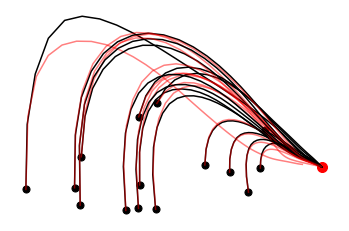

In [11]:
fig, ax = plt.subplots(1, 1)
for i in range(15):
    ax.plot(x_kooc_4[i, :, 0], x_kooc_4[i, :, 1], color='k')
    ax.plot(x_kooc_3[i, :, 0], x_kooc_3[i, :, 1], color='r', alpha=0.5)
    ax.scatter(x_kooc_3[i, 0, 0], x_kooc_3[i, 0, 1], color='k', s=50)
    ax.scatter(x_kooc_4[i, -1, 0], x_kooc_4[i, -1, 1], color='k', s=10)
ax.scatter([x_goal[0]], [x_goal[1]], color='r', s=100)
ax.axis('off')
plt.show()

In [12]:
animate([r'$n=2$', r'$n=5$', r'$n=10$', r'$n=25$', r'$n=50$']
        , 'kooc_nshifts', x_kooc_0, x_kooc_1, x_kooc_2, x_kooc_3, x_kooc_4)